In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Logistic Regression

Logistic Regression Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44        18
           1       0.17      0.17      0.17        12

    accuracy                           0.33        30
   macro avg       0.31      0.31      0.31        30
weighted avg       0.33      0.33      0.33        30

Confusion Matrix:
 [[ 8 10]
 [10  2]]

Channel matrix C (10x10):
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R (10x10):
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 

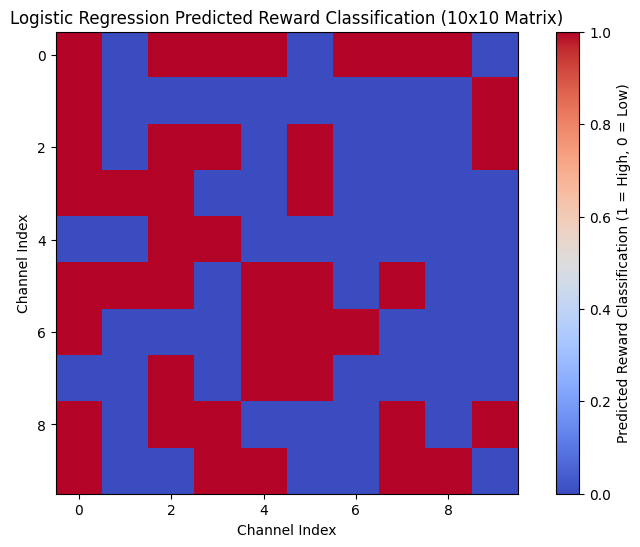

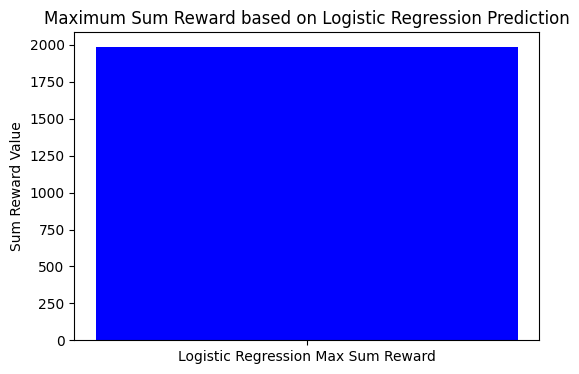

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Flatten the matrices for use in logistic regression
C_flat = C.flatten()  # Channel values
R_flat = R_normalized.flatten()  # Normalized reward values

# Define a binary classification target: high reward (1) vs. low reward (0)
threshold = 0.5  # Set threshold for reward classification
R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

# Prepare the feature matrix
X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
y = R_target  # Binary reward target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print model performance metrics
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate predictions for the entire dataset (reshaped to 10x10 for comparison with initial rewards)
y_pred_full = log_reg.predict(X).reshape(subset_size, subset_size)

# Convert the predicted binary classification back into reward values
# Setting reward to original value if classified as high (1), otherwise 0
predicted_reward_matrix = np.where(y_pred_full == 1, R, 0)

# Calculate the maximum sum reward based on logistic regression predictions
max_sum_reward = np.sum(predicted_reward_matrix)

# Display results
print("\nChannel matrix C (10x10):\n", C)
print("Initial Reward matrix R (10x10):\n", R)
print("Predicted Reward Classification (Logistic Regression):\n", y_pred_full)
print("Predicted Reward Values Matrix (10x10):\n", predicted_reward_matrix)
print("Calculated Maximum Sum Reward:", max_sum_reward)

# Plotting the predicted reward classification as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(y_pred_full, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Predicted Reward Classification (1 = High, 0 = Low)")
plt.title("Logistic Regression Predicted Reward Classification (10x10 Matrix)")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()

# Plotting the Max Sum Reward as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(["Logistic Regression Max Sum Reward"], [max_sum_reward], color="blue")
plt.ylabel("Sum Reward Value")
plt.title("Maximum Sum Reward based on Logistic Regression Prediction")
plt.show()


### Decision Tree

Channel matrix C (10x10):
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R (10x10):
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Predicted Reward matrix R_pred (Decision Tree):
 [[46.18604651 46.77192982 46.18604651 46.18604651 46.18604651 46.77192982
  46.18604651 46.18604651 46.18604651 46.77192982]
 [46.18604651 46.77192982 46.77192982 46.77192982 46.77192982 46.77192982
  46.77192982 46.77192982 46.77192982 46.18604651]
 [46.18604651 46.77192982 46.18604651 46.18604651 46.77192982 46.18604651
  46

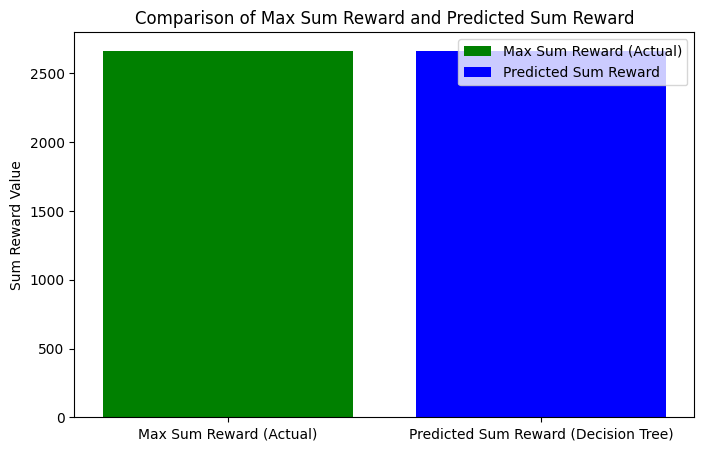

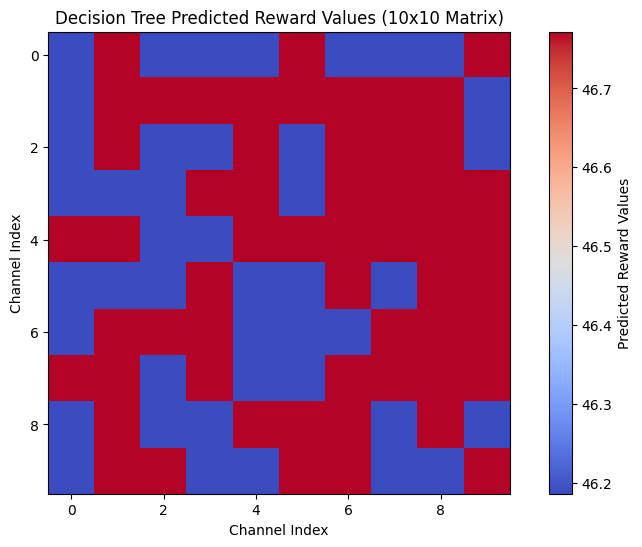

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1] for consistency
R_normalized = R / 100.0

# Flatten the matrices for use in decision tree regression
C_flat = C.flatten().reshape(-1, 1)  # Channel values as single-feature input
R_flat = R_normalized.flatten()  # Normalized reward values

# Initialize and train the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(C_flat, R_flat)

# Predict the reward values for the channel matrix
R_pred_flat = tree_regressor.predict(C_flat)
R_pred_matrix = R_pred_flat.reshape(subset_size, subset_size) * 100  # Scale back to original reward range

# Calculate the Sum Reward for the actual reward matrix (as the maximum achievable)
actual_reward_matrix = np.multiply(C, R)
max_sum_reward = np.sum(actual_reward_matrix)

# Calculate the Sum Reward based on the predicted reward matrix from the Decision Tree
predicted_reward_matrix = np.multiply(C, R_pred_matrix)
sum_reward_predicted = np.sum(predicted_reward_matrix)

# Output results
print("Channel matrix C (10x10):\n", C)
print("Initial Reward matrix R (10x10):\n", R)
print("Predicted Reward matrix R_pred (Decision Tree):\n", R_pred_matrix)
print("Actual product matrix (Max Sum Reward):\n", actual_reward_matrix)
print("Predicted product matrix:\n", predicted_reward_matrix)
print("Max Sum Reward from actual rewards:", max_sum_reward)
print("Sum Reward from Decision Tree prediction:", sum_reward_predicted)

# Plot both Max Sum Reward and Predicted Sum Reward
plt.figure(figsize=(8, 5))
plt.bar(["Max Sum Reward (Actual)"], [max_sum_reward], color="green", label="Max Sum Reward (Actual)")
plt.bar(["Predicted Sum Reward (Decision Tree)"], [sum_reward_predicted], color="blue", label="Predicted Sum Reward")
plt.ylabel("Sum Reward Value")
plt.title("Comparison of Max Sum Reward and Predicted Sum Reward")
plt.legend()
plt.show()

# Plotting a heatmap of predicted reward matrix
plt.figure(figsize=(10, 6))
plt.imshow(R_pred_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Predicted Reward Values")
plt.title("Decision Tree Predicted Reward Values (10x10 Matrix)")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()


# Random Forest

Channel matrix C (10x10):
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R (10x10):
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Predicted Reward matrix R_pred (Random Forest):
 [[46.88104771 46.73003803 46.88104771 46.88104771 46.88104771 46.73003803
  46.88104771 46.88104771 46.88104771 46.73003803]
 [46.88104771 46.73003803 46.73003803 46.73003803 46.73003803 46.73003803
  46.73003803 46.73003803 46.73003803 46.88104771]
 [46.88104771 46.73003803 46.88104771 46.88104771 46.73003803 46.88104771
  46

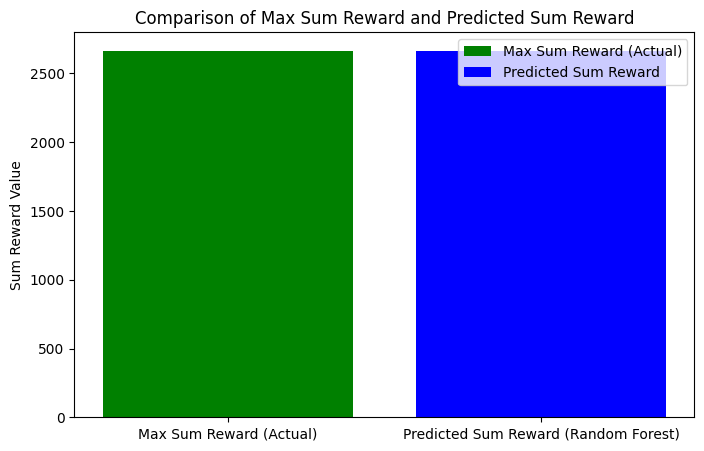

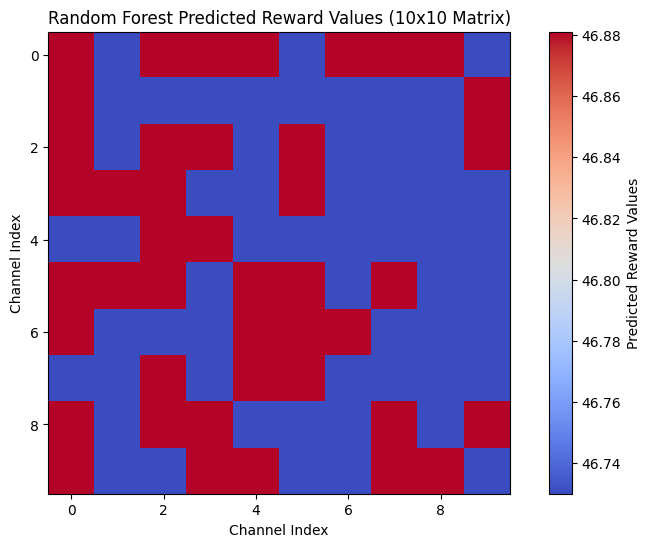

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1] for consistency
R_normalized = R / 100.0

# Flatten the matrices for use in Random Forest regression
C_flat = C.flatten().reshape(-1, 1)  # Channel values as single-feature input
R_flat = R_normalized.flatten()  # Normalized reward values

# Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(C_flat, R_flat)

# Predict the reward values for the channel matrix
R_pred_flat = rf_regressor.predict(C_flat)
R_pred_matrix = R_pred_flat.reshape(subset_size, subset_size) * 100  # Scale back to original reward range

# Calculate the Sum Reward for the actual reward matrix (as the maximum achievable)
actual_reward_matrix = np.multiply(C, R)
max_sum_reward = np.sum(actual_reward_matrix)

# Calculate the Sum Reward based on the predicted reward matrix from the Random Forest
predicted_reward_matrix = np.multiply(C, R_pred_matrix)
sum_reward_predicted = np.sum(predicted_reward_matrix)

# Output results
print("Channel matrix C (10x10):\n", C)
print("Initial Reward matrix R (10x10):\n", R)
print("Predicted Reward matrix R_pred (Random Forest):\n", R_pred_matrix)
print("Actual product matrix (Max Sum Reward):\n", actual_reward_matrix)
print("Predicted product matrix:\n", predicted_reward_matrix)
print("Max Sum Reward from actual rewards:", max_sum_reward)
print("Sum Reward from Random Forest prediction:", sum_reward_predicted)

# Plot both Max Sum Reward and Predicted Sum Reward
plt.figure(figsize=(8, 5))
plt.bar(["Max Sum Reward (Actual)"], [max_sum_reward], color="green", label="Max Sum Reward (Actual)")
plt.bar(["Predicted Sum Reward (Random Forest)"], [sum_reward_predicted], color="blue", label="Predicted Sum Reward")
plt.ylabel("Sum Reward Value")
plt.title("Comparison of Max Sum Reward and Predicted Sum Reward")
plt.legend()
plt.show()

# Plotting a heatmap of predicted reward matrix
plt.figure(figsize=(10, 6))
plt.imshow(R_pred_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Predicted Reward Values")
plt.title("Random Forest Predicted Reward Values (10x10 Matrix)")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()


# Support Vector Machine

Channel matrix C (10x10):
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R (10x10):
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Predicted Reward matrix R_pred (SVM):
 [[43. 46. 43. 43. 43. 46. 43. 43. 43. 46.]
 [43. 46. 46. 46. 46. 46. 46. 46. 46. 43.]
 [43. 46. 43. 43. 46. 43. 46. 46. 46. 43.]
 [43. 43. 43. 46. 46. 43. 46. 46. 46. 46.]
 [46. 46. 43. 43. 46. 46. 46. 46. 46. 46.]
 [43. 43. 43. 46. 43. 43. 46. 43. 46. 46.]
 [43. 46. 46. 46. 43. 43. 43. 46. 46. 46.]
 [46. 46. 43. 46. 43. 43. 46. 46. 46.

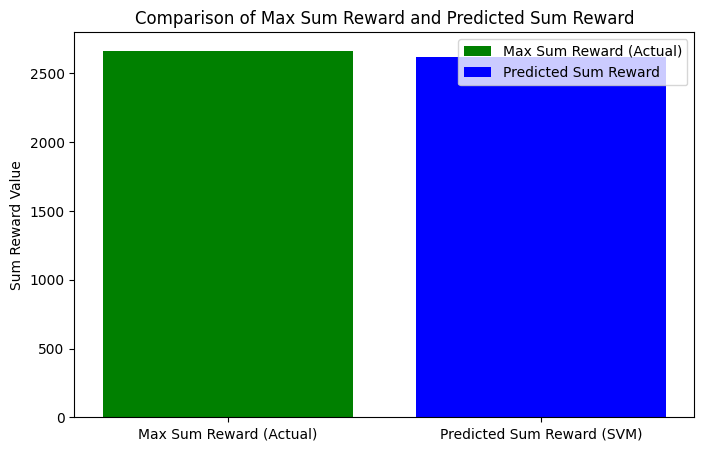

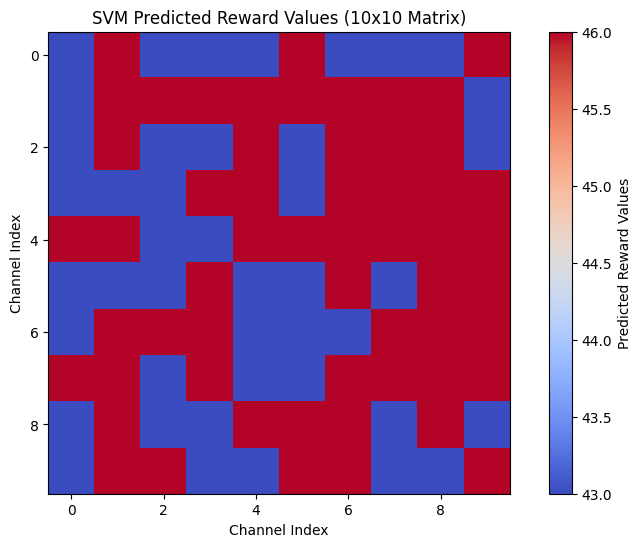

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1] for consistency
R_normalized = R / 100.0

# Flatten the matrices for use in SVM regression
C_flat = C.flatten().reshape(-1, 1)  # Channel values as single-feature input
R_flat = R_normalized.flatten()  # Normalized reward values

# Scale the input features
scaler = StandardScaler()
C_flat_scaled = scaler.fit_transform(C_flat)

# Initialize and train the SVM Regressor model
svm_regressor = SVR(kernel='rbf')  # Using radial basis function kernel
svm_regressor.fit(C_flat_scaled, R_flat)

# Predict the reward values for the channel matrix
R_pred_flat = svm_regressor.predict(C_flat_scaled)
R_pred_matrix = R_pred_flat.reshape(subset_size, subset_size) * 100  # Scale back to original reward range

# Calculate the Sum Reward for the actual reward matrix (as the maximum achievable)
actual_reward_matrix = np.multiply(C, R)
max_sum_reward = np.sum(actual_reward_matrix)

# Calculate the Sum Reward based on the predicted reward matrix from the SVM
predicted_reward_matrix = np.multiply(C, R_pred_matrix)
sum_reward_predicted = np.sum(predicted_reward_matrix)

# Output results
print("Channel matrix C (10x10):\n", C)
print("Initial Reward matrix R (10x10):\n", R)
print("Predicted Reward matrix R_pred (SVM):\n", R_pred_matrix)
print("Actual product matrix (Max Sum Reward):\n", actual_reward_matrix)
print("Predicted product matrix:\n", predicted_reward_matrix)
print("Max Sum Reward from actual rewards:", max_sum_reward)
print("Sum Reward from SVM prediction:", sum_reward_predicted)

# Plot both Max Sum Reward and Predicted Sum Reward
plt.figure(figsize=(8, 5))
plt.bar(["Max Sum Reward (Actual)"], [max_sum_reward], color="green", label="Max Sum Reward (Actual)")
plt.bar(["Predicted Sum Reward (SVM)"], [sum_reward_predicted], color="blue", label="Predicted Sum Reward")
plt.ylabel("Sum Reward Value")
plt.title("Comparison of Max Sum Reward and Predicted Sum Reward")
plt.legend()
plt.show()

# Plotting a heatmap of predicted reward matrix
plt.figure(figsize=(10, 6))
plt.imshow(R_pred_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Predicted Reward Values")
plt.title("SVM Predicted Reward Values (10x10 Matrix)")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()


# k-Nearest Neighbors (k-NN)

Channel matrix C (10x10):
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R (10x10):
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Predicted Reward matrix R_pred (KNN):
 [[65.         58.66666667 65.         65.         65.         58.66666667
  65.         65.         65.         58.66666667]
 [65.         58.66666667 58.66666667 58.66666667 58.66666667 58.66666667
  58.66666667 58.66666667 58.66666667 65.        ]
 [65.         58.66666667 65.         65.         58.66666667 65.
  58.66666667 58.66666

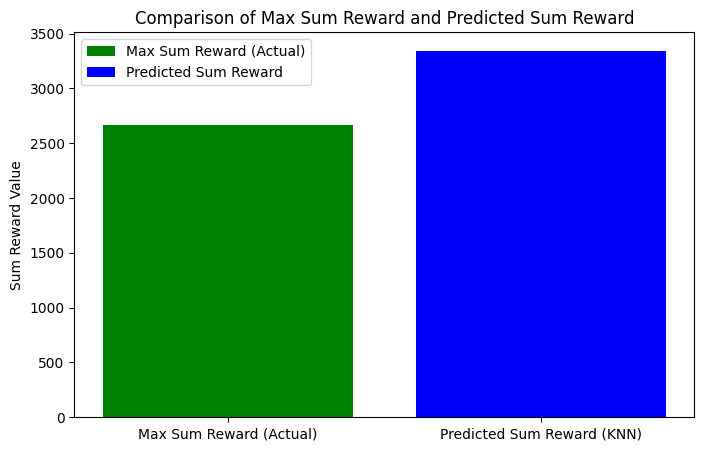

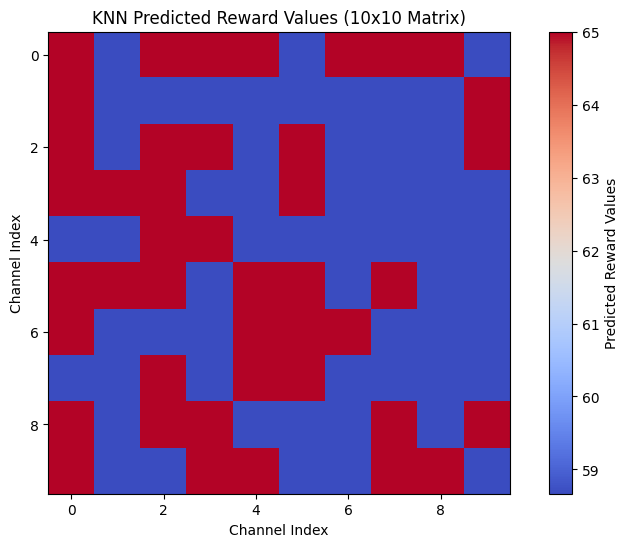

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1] for consistency
R_normalized = R / 100.0

# Flatten the matrices for use in KNN regression
C_flat = C.flatten().reshape(-1, 1)  # Channel values as single-feature input
R_flat = R_normalized.flatten()  # Normalized reward values

# Scale the input features
scaler = StandardScaler()
C_flat_scaled = scaler.fit_transform(C_flat)

# Initialize and train the KNN Regressor model
k = 3  # You can change the number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(C_flat_scaled, R_flat)

# Predict the reward values for the channel matrix
R_pred_flat = knn_regressor.predict(C_flat_scaled)
R_pred_matrix = R_pred_flat.reshape(subset_size, subset_size) * 100  # Scale back to original reward range

# Calculate the Sum Reward for the actual reward matrix (as the maximum achievable)
actual_reward_matrix = np.multiply(C, R)
max_sum_reward = np.sum(actual_reward_matrix)

# Calculate the Sum Reward based on the predicted reward matrix from KNN
predicted_reward_matrix = np.multiply(C, R_pred_matrix)
sum_reward_predicted = np.sum(predicted_reward_matrix)

# Output results
print("Channel matrix C (10x10):\n", C)
print("Initial Reward matrix R (10x10):\n", R)
print("Predicted Reward matrix R_pred (KNN):\n", R_pred_matrix)
print("Actual product matrix (Max Sum Reward):\n", actual_reward_matrix)
print("Predicted product matrix:\n", predicted_reward_matrix)
print("Max Sum Reward from actual rewards:", max_sum_reward)
print("Sum Reward from KNN prediction:", sum_reward_predicted)

# Plot both Max Sum Reward and Predicted Sum Reward
plt.figure(figsize=(8, 5))
plt.bar(["Max Sum Reward (Actual)"], [max_sum_reward], color="green", label="Max Sum Reward (Actual)")
plt.bar(["Predicted Sum Reward (KNN)"], [sum_reward_predicted], color="blue", label="Predicted Sum Reward")
plt.ylabel("Sum Reward Value")
plt.title("Comparison of Max Sum Reward and Predicted Sum Reward")
plt.legend()
plt.show()

# Plotting a heatmap of predicted reward matrix
plt.figure(figsize=(10, 6))
plt.imshow(R_pred_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Predicted Reward Values")
plt.title("KNN Predicted Reward Values (10x10 Matrix)")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()


In [ ]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.1 MB/s eta 0:00:00


# comparsion b/w GA and KNN

Results:
Final Max Sum Reward (Genetic Algorithm): 7121.24
Final Max Sum Reward (KNN): 3344.00


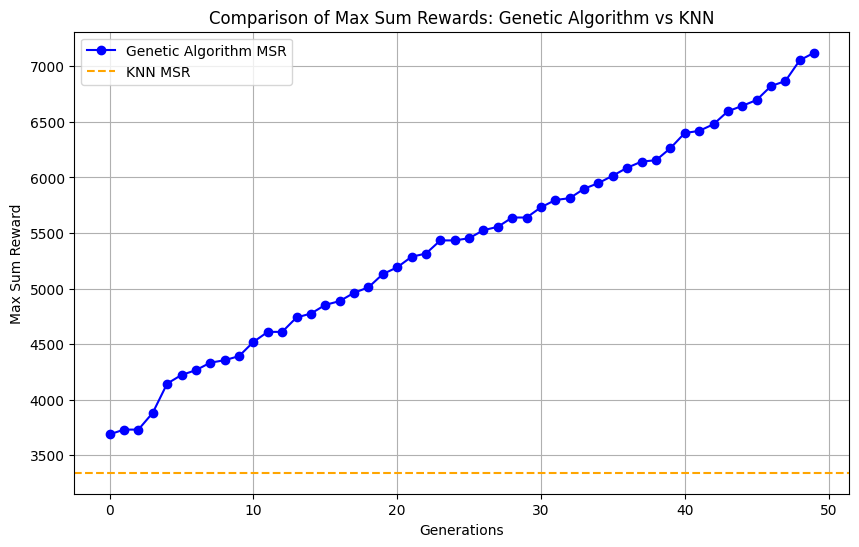

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Function to calculate the MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)
    return np.sum(row_sums)

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic Algorithm fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size, subset_size)
    msr_reward = calculate_msr_reward(C, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size = 100
population = toolbox.population(n=population_size)
ngen = 50
cxpb = 0.7
mutpb = 0.3

# Run the Genetic Algorithm
max_sum_rewards_ga = []
for gen in range(ngen):
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)
    sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
    max_sum_rewards_ga.append(np.max(sum_rewards))

# Extract the best individual from GA
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix_ga = np.array(best_individual).reshape(subset_size, subset_size) * 100
final_msr_reward_ga = calculate_msr_reward(C, best_individual_matrix_ga)

# KNN Regression Setup
C_flat = C.flatten().reshape(-1, 1)
R_flat = R_normalized.flatten()
scaler = StandardScaler()
C_flat_scaled = scaler.fit_transform(C_flat)

# KNN Regressor
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(C_flat_scaled, R_flat)
R_pred_flat = knn_regressor.predict(C_flat_scaled)
R_pred_matrix = R_pred_flat.reshape(subset_size, subset_size) * 100
final_msr_reward_knn = calculate_msr_reward(C, R_pred_matrix)

# Output results
print("Results:")
print(f"Final Max Sum Reward (Genetic Algorithm): {final_msr_reward_ga:.2f}")
print(f"Final Max Sum Reward (KNN): {final_msr_reward_knn:.2f}")

# Plot comparison of Max Sum Rewards
plt.figure(figsize=(10, 6))
plt.plot(max_sum_rewards_ga, label="Genetic Algorithm MSR", color='blue', marker='o')
plt.axhline(y=final_msr_reward_knn, color='orange', linestyle='--', label="KNN MSR")
plt.xlabel("Generations")
plt.ylabel("Max Sum Reward")
plt.title("Comparison of Max Sum Rewards: Genetic Algorithm vs KNN")
plt.legend()
plt.grid()
plt.show()


# Comparsion b/w GA and logistic regression

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Results:
Final Max Sum Reward (Genetic Algorithm): 7024.39
Final Max Sum Reward (Logistic Regression): 2505.21
Accuracy of Logistic Regression: 0.60


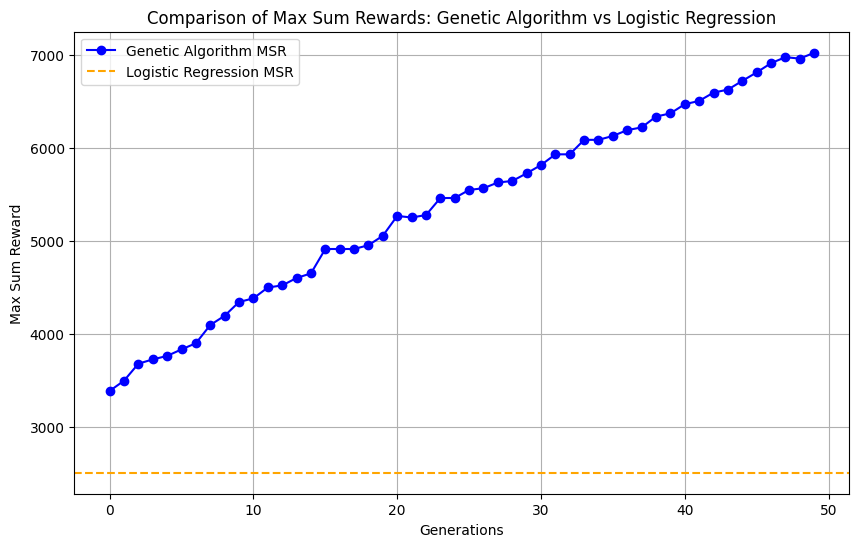

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Function to calculate the MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)
    return np.sum(row_sums)

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic Algorithm fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size, subset_size)
    msr_reward = calculate_msr_reward(C, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size = 100
population = toolbox.population(n=population_size)
ngen = 50
cxpb = 0.7
mutpb = 0.3

# Run the Genetic Algorithm
max_sum_rewards_ga = []
for gen in range(ngen):
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)
    sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
    max_sum_rewards_ga.append(np.max(sum_rewards))

# Extract the best individual from GA
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix_ga = np.array(best_individual).reshape(subset_size, subset_size) * 100
final_msr_reward_ga = calculate_msr_reward(C, best_individual_matrix_ga)

# Prepare data for Logistic Regression
C_flat = C.flatten()
R_flat = R_normalized.flatten()
X = C_flat.reshape(-1, 1)  # Reshape for logistic regression
y = (R_flat > 0.5).astype(int)  # Create binary target: 1 if reward > 0.5, else 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate predictions
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

# Calculate MSR for the predicted rewards based on Logistic Regression
R_pred_matrix_lr = np.array([log_reg.predict_proba(np.array([[val]]))[:, 1] * 100 for val in C_flat]).reshape(subset_size, subset_size)
final_msr_reward_lr = calculate_msr_reward(C, R_pred_matrix_lr)

# Output results
print("Results:")
print(f"Final Max Sum Reward (Genetic Algorithm): {final_msr_reward_ga:.2f}")
print(f"Final Max Sum Reward (Logistic Regression): {final_msr_reward_lr:.2f}")
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")

# Plot comparison of Max Sum Rewards
plt.figure(figsize=(10, 6))
plt.plot(max_sum_rewards_ga, label="Genetic Algorithm MSR", color='blue', marker='o')
plt.axhline(y=final_msr_reward_lr, color='orange', linestyle='--', label="Logistic Regression MSR")
plt.xlabel("Generations")
plt.ylabel("Max Sum Reward")
plt.title("Comparison of Max Sum Rewards: Genetic Algorithm vs Logistic Regression")
plt.legend()
plt.grid()
plt.show()


# DT vs GA

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Results:
Final Max Sum Reward (Genetic Algorithm): 7339.77
Final Max Sum Reward (Decision Tree): 2666.00


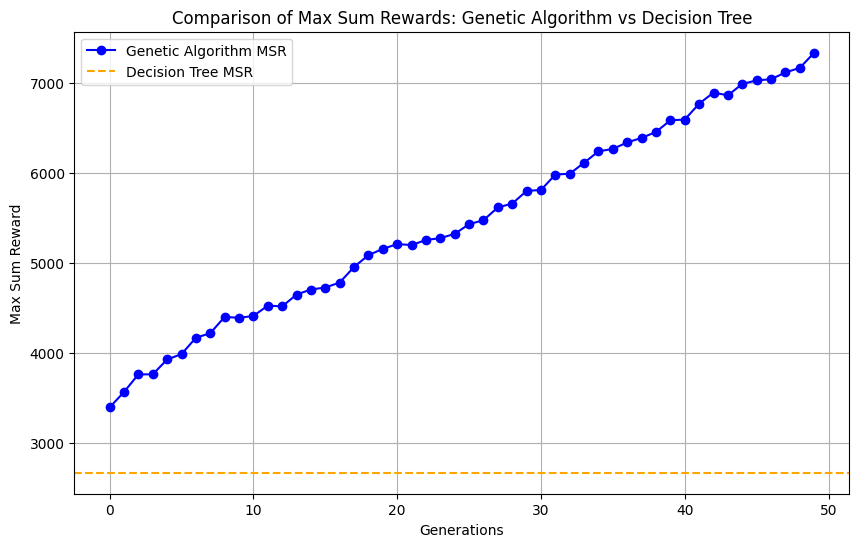

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from deap import base, creator, tools, algorithms

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Function to calculate the MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)
    return np.sum(row_sums)

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic Algorithm fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size, subset_size)
    msr_reward = calculate_msr_reward(C, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size = 100
population = toolbox.population(n=population_size)
ngen = 50
cxpb = 0.7
mutpb = 0.3

# Run the Genetic Algorithm
max_sum_rewards_ga = []
for gen in range(ngen):
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)
    sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
    max_sum_rewards_ga.append(np.max(sum_rewards))

# Extract the best individual from GA
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix_ga = np.array(best_individual).reshape(subset_size, subset_size) * 100
final_msr_reward_ga = calculate_msr_reward(C, best_individual_matrix_ga)

# Decision Tree Regressor
# Flatten the matrices for use in decision tree regression
C_flat = C.flatten().reshape(-1, 1)  # Channel values as single-feature input
R_flat = R_normalized.flatten()  # Normalized reward values

# Initialize and train the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(C_flat, R_flat)

# Predict the reward values for the channel matrix
R_pred_flat = tree_regressor.predict(C_flat)
R_pred_matrix_dt = R_pred_flat.reshape(subset_size, subset_size) * 100  # Scale back to original reward range

# Calculate the MSR for the predicted rewards based on Decision Tree
final_msr_reward_dt = calculate_msr_reward(C, R_pred_matrix_dt)

# Output results
print("Results:")
print(f"Final Max Sum Reward (Genetic Algorithm): {final_msr_reward_ga:.2f}")
print(f"Final Max Sum Reward (Decision Tree): {final_msr_reward_dt:.2f}")

# Plot comparison of Max Sum Rewards
plt.figure(figsize=(10, 6))
plt.plot(max_sum_rewards_ga, label="Genetic Algorithm MSR", color='blue', marker='o')
plt.axhline(y=final_msr_reward_dt, color='orange', linestyle='--', label="Decision Tree MSR")
plt.xlabel("Generations")
plt.ylabel("Max Sum Reward")
plt.title("Comparison of Max Sum Rewards: Genetic Algorithm vs Decision Tree")
plt.legend()
plt.grid()
plt.show()


# RF vs GA

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Results:
Final Max Sum Reward (Genetic Algorithm): 7017.81
Final Max Sum Reward (Random Forest): 2663.61


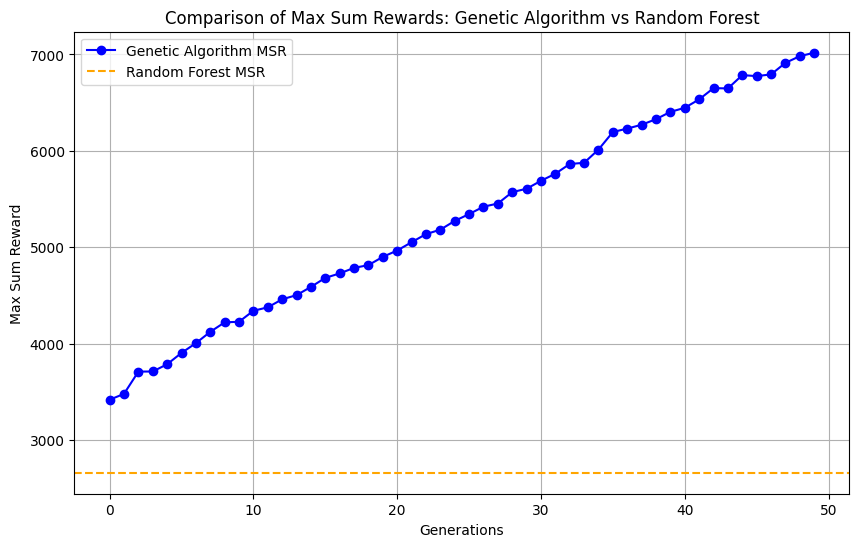

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from deap import base, creator, tools, algorithms

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Function to calculate the MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)
    return np.sum(row_sums)

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic Algorithm fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size, subset_size)
    msr_reward = calculate_msr_reward(C, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size = 100
population = toolbox.population(n=population_size)
ngen = 50
cxpb = 0.7
mutpb = 0.3

# Run the Genetic Algorithm
max_sum_rewards_ga = []
for gen in range(ngen):
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)
    sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
    max_sum_rewards_ga.append(np.max(sum_rewards))

# Extract the best individual from GA
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix_ga = np.array(best_individual).reshape(subset_size, subset_size) * 100
final_msr_reward_ga = calculate_msr_reward(C, best_individual_matrix_ga)

# Random Forest Regressor
# Flatten the matrices for use in random forest regression
C_flat = C.flatten().reshape(-1, 1)  # Channel values as single-feature input
R_flat = R_normalized.flatten()  # Normalized reward values

# Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(C_flat, R_flat)

# Predict the reward values for the channel matrix
R_pred_flat = rf_regressor.predict(C_flat)
R_pred_matrix_rf = R_pred_flat.reshape(subset_size, subset_size) * 100  # Scale back to original reward range

# Calculate the MSR for the predicted rewards based on Random Forest
final_msr_reward_rf = calculate_msr_reward(C, R_pred_matrix_rf)

# Output results
print("Results:")
print(f"Final Max Sum Reward (Genetic Algorithm): {final_msr_reward_ga:.2f}")
print(f"Final Max Sum Reward (Random Forest): {final_msr_reward_rf:.2f}")

# Plot comparison of Max Sum Rewards
plt.figure(figsize=(10, 6))
plt.plot(max_sum_rewards_ga, label="Genetic Algorithm MSR", color='blue', marker='o')
plt.axhline(y=final_msr_reward_rf, color='orange', linestyle='--', label="Random Forest MSR")
plt.xlabel("Generations")
plt.ylabel("Max Sum Reward")
plt.title("Comparison of Max Sum Rewards: Genetic Algorithm vs Random Forest")
plt.legend()
plt.grid()
plt.show()
